In [1]:
#import relevant libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import CommonMotifProb as MP
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
import random

In [2]:
#define files
path='Residue_Dataframes/'
#inputfiles=['H3_fixed_residue_Dataframe_non-motif-positions_allResidues.csv']
#inputfiles=['NP_fixed_residue_Dataframe_motif-positions_allResidues.csv']
#inputfiles=['NP_fixed_residue_Dataframe_non-motif-positions_allResidues.csv']
#inputfiles=['NS2_residues_Dataframe_motif-positions_allResidues.csv','M2_residues_Dataframe_motif-positions_allResidues.csv','PA_fixed_residue_Dataframe_motif-positions_allResidues.csv']#['NP_fixed_residue_Dataframe_motif-positions_allResidues.csv']
inputfiles=['NP_fixed_residue_Dataframe_motif-positions_allResidues.csv', 'M12_fixed_residue_Dataframe_motif-positions_allResidues.csv','NS12_residue_Dataframe_motif-positions_allResidues.csv','NS2_residues_Dataframe_motif-positions_allResidues.csv','M2_residues_Dataframe_motif-positions_allResidues.csv','PA_fixed_residue_Dataframe_motif-positions_allResidues.csv']#,'PB1_fixed_residue_Dataframe_motif-positions_allResidues.csv','PB2_fixed_residue_Dataframe_motif-positions_allResidues.csv']
#inputfiles=['NP_fixed_residue_Dataframe_motif-positions_allResidues.csv', 'M12_fixed_residue_Dataframe_motif-positions_allResidues.csv','NS12_residue_Dataframe_motif-positions_allResidues.csv']#'A','B','C']
nonmotiffiles=['NP_fixed_residue_Dataframe_non-motif-positions_S_T.csv','M12_fixed_residue_Dataframe_non-motif-positions_S_T.csv','NS12_residue_Dataframe_non-motif-positions_S_T.csv']

In [3]:
#read in selected motifs file
#also read in motifs to compare with from full motifs file?
path='Residue_Dataframes/'
keyresiduedata=[pd.read_csv(path+i,index_col=0) for i in inputfiles]
#keyresiduedataconcat=pd.concat(keyresiduedata)

nonmotifdata=[pd.read_csv(path+i,index_col=0) for i in nonmotiffiles]
#nonmotifdata=pd.concat(nonmotifdata)

AAs=['S','T']


relevantcodons=[j.replace('U','T') for i in AAs for j in MP.AAtoCodonDICT[MP.SingleLetterDICT[i]]]


In [15]:
#settings for phopshocodons
protallsites={}
prots=['NP.','M1.','NS1.','NS2.','M2.','PA.']#,'PB1.','PB2.']#['PB1.','PB2.']#['NP.']#['NS2.','M2.','PA.','PB1.','PB2.']#['NP.','M1.','NS1.']
positionProts={}
for i,prot in enumerate(prots):
    codons={}
    positions=keyresiduedata[i]['ResidueNo'].value_counts().keys()
    positions =list(positions)# positions for H3 S/T: [15,31,278,476,38,158,74,56,115,126,137,239,119]
    
    for j in positions:
        dftemp=keyresiduedata[i][keyresiduedata[i]['ResidueNo']==j]
        codons[j]=dftemp['Codon'].value_counts()
    positions.sort()
    print (positions)
    positionProts[prot]=positions
    protallsites[prot]=codons
    

[6, 9, 165, 188, 378, 402, 457, 472]
[5, 9, 37, 108, 168, 169, 195, 225]
[42, 49, 80, 195, 197, 215]
[23, 24, 25]
[64, 65]
[157, 162, 224, 225]


In [9]:
def circleAratio(ratio,maxA):
    return np.sqrt((ratio*maxA)/np.pi)

In [16]:
#Lump all other amino acid version
from matplotlib.patches import Circle
import numpy as np
SerThr=['TCT','TCC','ACC','ACT','ACG','ACA','TCG','TCA','AGC','AGT']
allcodons=['TCT','TCC','ACC','ACT','ACG','ACA','TCG','TCA','AGC','AGT']
labels=['TCT','TCC','ACC','ACT','ACG','ACA','TCG','TCA','AGC','AGT','Non-ST']#,'N','A','P','L','C','I','K','R','F','Y','W','V','M','H','Q','D','E','G']

totalpos=0
for prot in prots:
    positions=positionProts[prot]
    totalpos+=len(positions)
    codons=protallsites[prot]
    for i in positions:    
        for j in codons[i].keys():
            #aa=MP.translateRNA(j)
            if j not in allcodons:
                allcodons.append(j)
                #if aa not in labels:
                 #   labels.append(aa)
                
#make a new dict with codons and amino acids with the appropriate counts for each and a total.
for prot in prots:
    positions=positionProts[prot]
    codons=protallsites[prot]
    for j in positions:
        for i in allcodons:
            #if codon in ser/thr codons either add 0.0 or just count. If codon not in ser/thr translate and add to amino 
            #acid count.
            try:
                a= codons[j][i]
            except:
                codons[j][i]=0.0
for prot in prots:
    positions=positionProts[prot]
    codons=protallsites[prot]
    for j in positions:
        for i in allcodons:
            if i not in SerThr:
                #add count for each codon to the count for the amino acid instead

                try:
                    codons[j]['Non-ST']+=codons[j][i]
                except:
                    codons[j]['Non-ST']=codons[j][i]
                #set non ser/thr codon to zero so the sum is not counted twice    
                codons[j][i]=0.0
#set add missing amino acid data as zero to enable plotting 
for prot in prots:
    positions=positionProts[prot]
    codons=protallsites[prot]
    for j in positions:
        for i in labels:                 
            try:
                print (codons[j][i])
            except KeyError:
                codons[j][i]=0.0
                    
                    
    


0.0
0.0
9583.0
1.0
0.0
1.0
0.0
0.0
0.0
0.0
4.0
6980.0
507.0
0.0
4.0
0.0
1.0
58.0
2006.0
0.0
0.0
35.0
8888.0
663.0
0.0
2.0
0.0
0.0
15.0
22.0
0.0
0.0
1.0
0.0
0.0
3.0
26.0
943.0
8613.0
0.0
0.0
0.0
0.0
6.0
0.0
1.0
2115.0
7283.0
9.0
182.0
0.0
0.0
0.0
0.0
2.0
5027.0
4441.0
0.0
2.0
0.0
0.0
14.0
90.0
0.0
0.0
13.0
3947.0
3497.0
0.0
0.0
0.0
0.0
363.0
1784.0
0.0
0.0
1.0
0.0
0.0
0.0
5.0
9300.0
4.0
1.0
0.0
0.0
0.0
282.0
0.0
2.0
9610.0
44.0
8.0
245.0
0.0
0.0
0.0
0.0
11.0
0.0
0.0
0.0
3.0
9908.0
0.0
0.0
0.0
0.0
0.0
10.0
0.0
0.0
4468.0
318.0
9.0
4950.0
0.0
39.0
0.0
0.0
137.0
0.0
0.0
9.0
36.0
2554.0
7315.0
0.0
0.0
0.0
0.0
5.0
0.0
0.0
2641.0
255.0
29.0
5963.0
0.0
0.0
0.0
0.0
1029.0
0.0
3.0
9652.0
125.0
1.0
121.0
0.0
0.0
1.0
0.0
15.0
180.0
0.0
0.0
6.0
0.0
3.0
3788.0
5930.0
0.0
0.0
7.0
1833.0
7832.0
231.0
1.0
0.0
2.0
0.0
16.0
0.0
0.0
4.0
1661.0
5835.0
0.0
0.0
0.0
0.0
151.0
84.0
0.0
1.0
929.0
0.0
0.0
1703.0
6013.0
1.0
929.0
0.0
0.0
0.0
0.0
14.0
2.0
5.0
2890.0
2550.0
5.0
1197.0
0.0
1.0
2.0
16.0
1042.0
8416.0

NP.
M1.
NS1.
NS2.
M2.
PA.


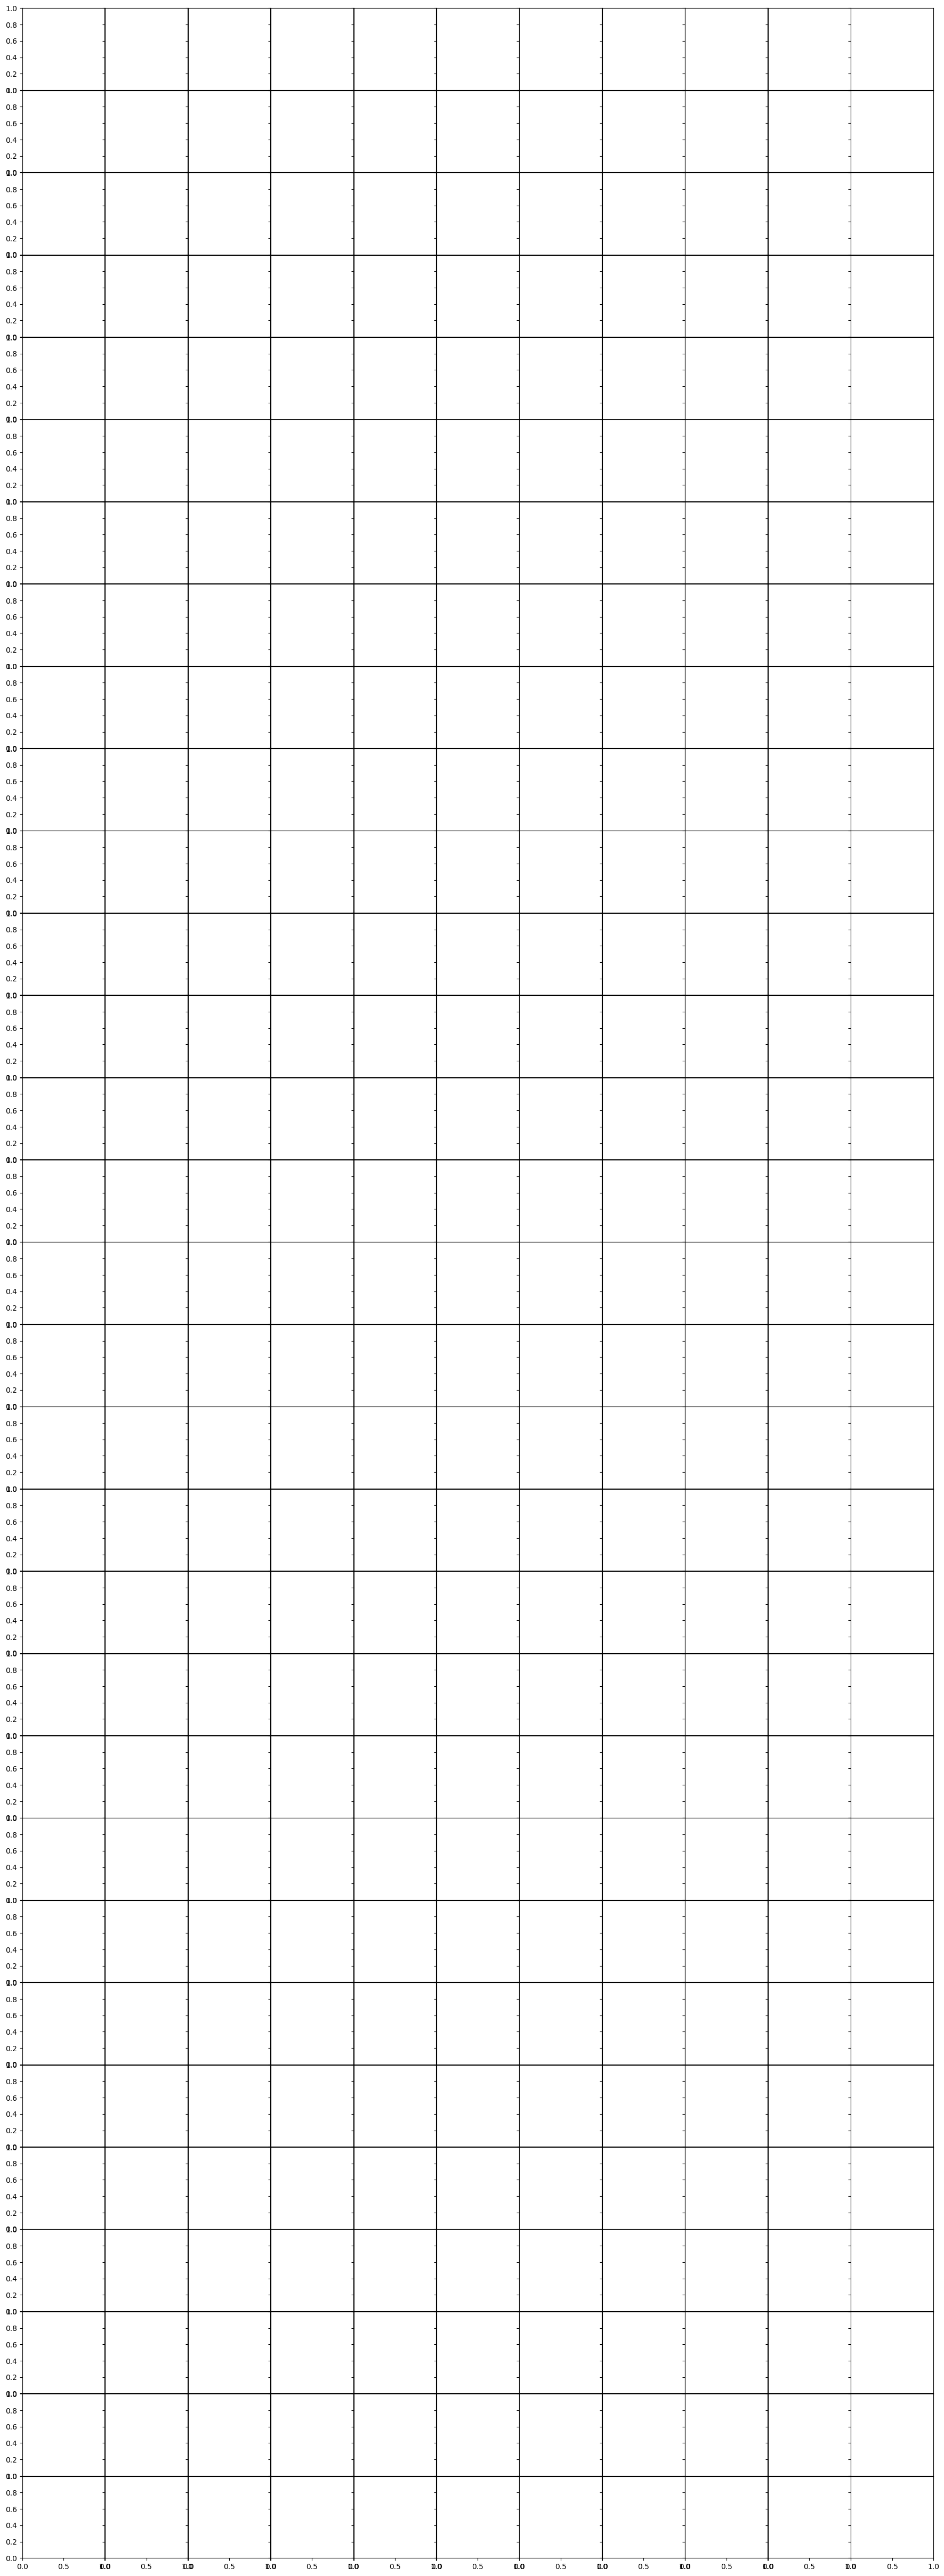

In [25]:
#I want to add non ser/thr as counts for individual amino acids instead of codons. 

positionstot=0      
#fig,ax_handles= plt.subplots(totalpos, len(labels),gridspec_kw = {'wspace':0.0,'hspace':0.2},figsize=(2*len(labels),2*totalpos), sharex=True,sharey=True)
for prot in prots:
    print (prot)
    positionstot+=len(positionProts[prot])
    codons=protallsites[prot]
fig,ax_handles= plt.subplots(positionstot, len(labels),gridspec_kw = {'wspace':0.005,'hspace':0.005},figsize=(2.005*len(labels),2.005*positionstot), sharex=True,sharey=True)  
#fig.text(0.10, 0.5, 'Residue 402', rotation=0)


In [26]:
font=22
weight='semibold'
maxR=10.0
maxA=maxR**2*np.pi
#plt.ylabel("S9",rotation=0)
j=0
for prot in prots:
   # print prot
    positions=positionProts[prot]
    codons=protallsites[prot]
    #fig,ax_handles= plt.subplots(len(positions), len(labels),gridspec_kw = {'wspace':0.0,'hspace':0.2},figsize=(2*len(labels),2*len(positions)), sharex=True,sharey=True)
    for pos in positions:

        for i,codon in enumerate(labels):
            ax=ax_handles[j][i]
            codonratio=codons[pos][codon]/codons[pos].sum()


            c = Circle((0.0, 0.0), radius=circleAratio(codonratio,maxA),
                    edgecolor=None, facecolor='silver')
            #if codonratio!=0.0:

            #    c2 = Circle((0.0, 0.0), radius=maxR,
            #        edgecolor='Black', facecolor='white')
            #    ax.add_patch(c2)
            ax.add_patch(c)

            #x axis label details
            if pos==positionProts[prots[0]][0]:
                if codon in SerThr:
                    ax.set_xlabel(codon+' ('+MP.SingleLetterREVDICT[MP.DNACodontoAADICT[codon]]+')',labelpad=20,fontsize=font,fontweight=weight)
                    ax.xaxis.set_label_position('top')
                else:
                    ax.set_xlabel(codon,labelpad=20,fontsize=font,fontweight=weight)
                    ax.xaxis.set_label_position('top')


            #shape circles to fit plot box
            ax.set_xlim(-(maxR+0.2),maxR+0.2)
            ax.set_ylim(-(maxR+0.2),maxR+0.2)
            if labels[i] in ['ACG']:
                ax.spines['right'].set_visible(False)
                ax.spines['top'].set_visible(False)
                ax.spines['left'].set_visible(False)
                ax.spines['bottom'].set_visible(False)
            elif labels[i]==SerThr[0]:
                #y axis label details only at ends
                ax.set_ylabel(str(prot)+str(pos),rotation=0,labelpad=30+font,ha='center',fontsize=font,fontweight=weight)
                ax.yaxis.set_label_position('left')
                
                ax.spines['right'].set_visible(False)
                ax.spines['top'].set_visible(False)
                ax.spines['left'].set_visible(False)
                ax.spines['bottom'].set_visible(False)
            else:
                ax.spines['right'].set_visible(False)
                ax.spines['top'].set_visible(False)
                ax.spines['left'].set_visible(False)
                ax.spines['bottom'].set_visible(False)

            ax.set_xticks([])
            ax.set_yticks([])
            ax.set_aspect('equal')
            #ax.annotate(int(codons[pos][codon]),xy=(0,1),ha='center')
        j+=1


  



plt.show()


In [19]:
fig.savefig("test.pdf",format='pdf',transparent=True)

## Barplot comparison codon usage

In [27]:

#settings for non-phospho data from NP, NS1 and NS2
protallsites={}
prots=['NP.','M1.','NS1.']#['NP.','M1.','NS1.','NS2.','M2.','PA.','PB1.','PB2.']#['PB1.','PB2.']#['NP.']#['NS2.','M2.','PA.','PB1.','PB2.']#['NP.','M1.','NS1.']
positionProts={}
for i,prot in enumerate(prots):
    codons={}
    positions=keyresiduedata[i]['ResidueNo'].value_counts().keys()
    positions =list(positions)#, positions for H3 S/T: [15,31,278,476,38,158,74,56,115,126,137,239,119]

    for j in positions:
        dftemp=keyresiduedata[i][keyresiduedata[i]['ResidueNo']==j]
        codons[j]=dftemp['Codon'].value_counts()
    positions.sort()
    positionProts[prot]=positions
    protallsites[prot]=codons
    

In [28]:
#weighting to ensure all phospho locations from all proteins contribute equally and single sites don't 
#skew results unrealistically

#filterdata=[]
filterdata2=[]
#for i in keyresiduedata:
#    filterdata.append(i[i['AminoAcid'].isin(AAs)])
for i in keyresiduedata:#change to filterdata if filtering AAs above
    keyss=i['ResidueNo'].value_counts().keys()
    for j in keyss:
        filterdata2.append(i[i['ResidueNo']==j])
        


In [29]:
#weighting to ensure all non-phospho locations from all proteins contribute equally and single sites don't 
#skew results unrealistically (add filterdatanonmotif to only look at T/S and ignore other amino acids 
#(skews input from non-conserved residues as they can still count 100% then rather than <100))

#filterdatanonmotif=[]
filterdata2nonmotif=[]
#for i in nonmotifdata:
#    filterdatanonmotif.append(i[i['AminoAcid'].isin(AAs)])
for i in nonmotifdata:
    keyss=i['ResidueNo'].value_counts().keys()
    for j in keyss:
        filterdata2nonmotif.append(i[i['ResidueNo']==j])

In [32]:
#determine frequencies of all codons in keyresiduedata
CodonCounts=[i['Codon'].value_counts() for i in filterdata2]
nonmotifCodonCounts=[i['Codon'].value_counts() for i in filterdata2nonmotif]
CODONCOUNTSALL={}
codoncountsnonmotif={}
for i in relevantcodons:
    CODONCOUNTSALL[i]=0
    codoncountsnonmotif[i]=0
    for l in CodonCounts:
        try:
            if l[i]>=0:
                continue
        except KeyError:
            l[i]=0
    for k in nonmotifCodonCounts:
        try:
            if k[i]>=0:
                continue
        except KeyError:
            k[i]=0
for i in relevantcodons:
    try:
        CODONCOUNTSALL[i]=np.mean([ float(j[i])/j.sum() for j in CodonCounts])
    except KeyError:
        print ('ignored ',i)
    try:
        codoncountsnonmotif[i]=np.mean([ float(j[i])/j.sum() for j in nonmotifCodonCounts])
    except KeyError:
        print ('ignored ',i)

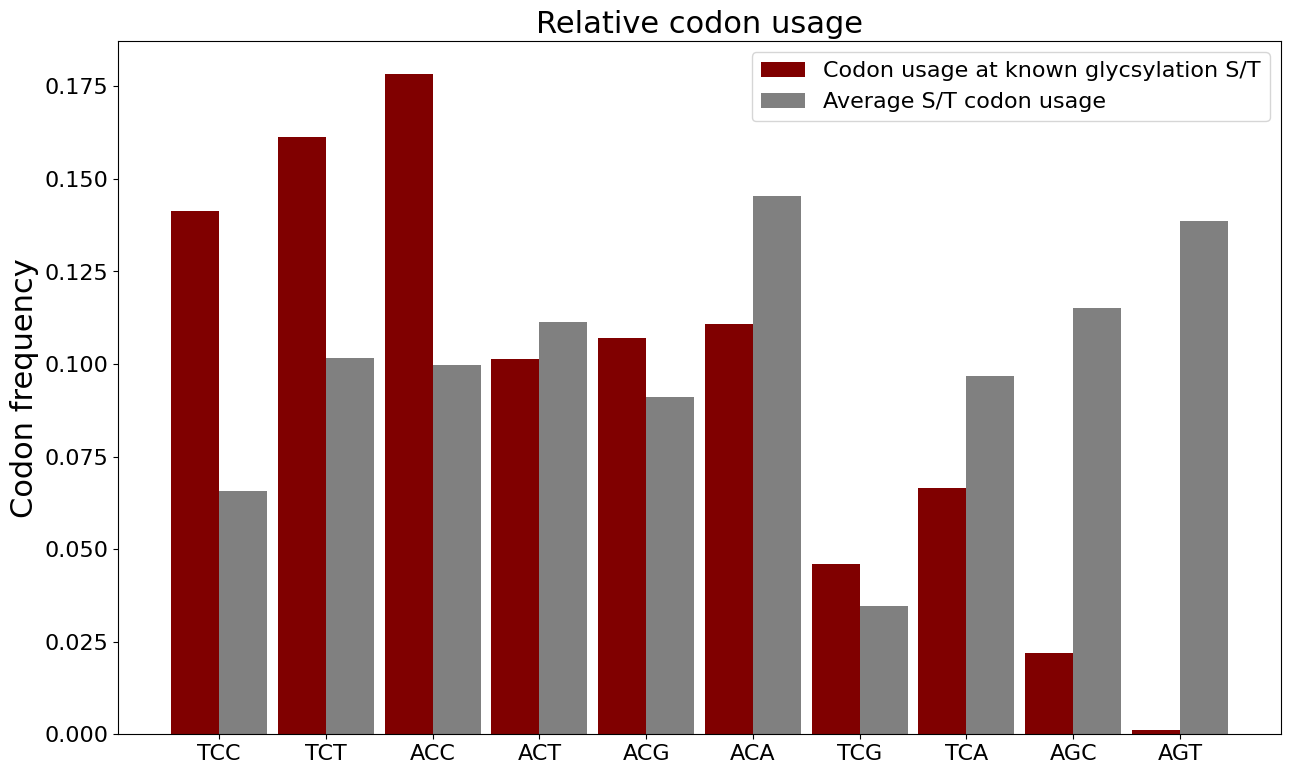

In [33]:
#somehow plot codons in motifs versus codons not in motifs that are related.
ind=np.arange(len(CODONCOUNTSALL))
labels=['TCC','TCT','ACC','ACT','ACG','ACA','TCG','TCA','AGC','AGT']
motifcodon = [CODONCOUNTSALL[j] for j in labels]
nonmotif = [codoncountsnonmotif[j] for j in labels]
   # the x locations for the groups

fig, ax = plt.subplots()
width = 0.45      # the width of the bars: can also be len(x) sequence
fig.set_size_inches(15, 9)
p1 = ax.bar(ind-width/2, motifcodon, width, color='maroon')
p2 = ax.bar(ind+width/2, nonmotif, width, color='grey')

plt.ylabel('Codon frequency',fontsize=22)
plt.title('Relative codon usage',fontsize=22)
plt.yticks(fontsize=16)
plt.xticks(ind, labels,fontsize=16)
plt.legend((p1[0], p2[0]), ('Codon usage at known glycsylation S/T', 'Average S/T codon usage'), fontsize=16)
plt.savefig("Codon_Usage_compare.pdf",format='pdf')
plt.show()